### Никишев И.О. 224-321 Лабораторная работа №1 Оценка влияния параметров дискретизации на точность передачи изображения 

Цель

Оценить влияния параметров дискретизации на точность передачи
изображения с помощью показателей качества изображений.

1. Выбрать частоту исходного сигнала и получить его изображение
с максимальной частотой дискретизации, которая будет использоваться в работе. При этом изображение исходного сигнала и дискретизированного с максимальной частотой будут идентичны.

Исходная частота дискретизации - 8192

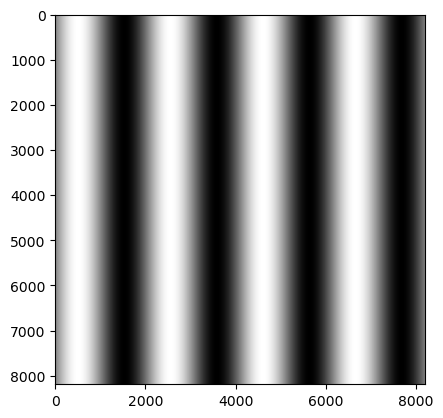

In [36]:
import numpy as np,matplotlib.pyplot as plt
def discr_sine(length=4, resolution=2048, shift = 0):
    """length - кол-во повторов, resolution - значений на 1 повтор, shift - смещение фазы (1 = 1 фаза)"""
    return np.array(int(length*resolution)*[(np.sin(np.arange(start = 2*shift*np.pi, stop = 2*np.pi*length + 2*shift*np.pi, step = (2*np.pi)/resolution))+1)/2])

original = discr_sine(resolution=2048)
plt.imshow(original, cmap = 'gray', vmin= 0, vmax=1)
plt.show()

2. Получить изображения дискретизированного сигнала, уменьшая
частоту дискретизации в два раза, начиная от максимальной.

In [37]:
signals=[]
msegraph =[]
psnrgraph = []
ssimgraph = []

# Метрики
def mse(image1, image2):
    return np.sum((image1.astype(int) - image2.astype(int))**2) / image1.size
def psnr(image1, image2):
    import math
    return 20 * math.log10(255/(mse(image1, image2)**0.5))
from skimage.metrics import structural_similarity as ssim

for i in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:

     # Провести увеличение разрешения изображений, таким образом чтобы оно совпало с изображением, полученным в п.1, размерности изображений должны быть равны
    signals.append(np.repeat(np.repeat(discr_sine(resolution=2048/i), i, axis=0), i, axis=1)) # Метод ближайшего соседа 
    
    #Рассчитать показатели MSE, PSNR и SSIM между изображением исходного сигнала и полученных с разной частотой дискретизациив пп. 2-3.
    msegraph.append(mse(original, signals[-1]))
    psnrgraph.append(psnr(original, signals[-1]))
    ssimgraph.append(ssim(original, signals[-1]))

2. Получить изображения дискретизированного сигнала, уменьшая
частоту дискретизации в два раза, начиная от максимальной.

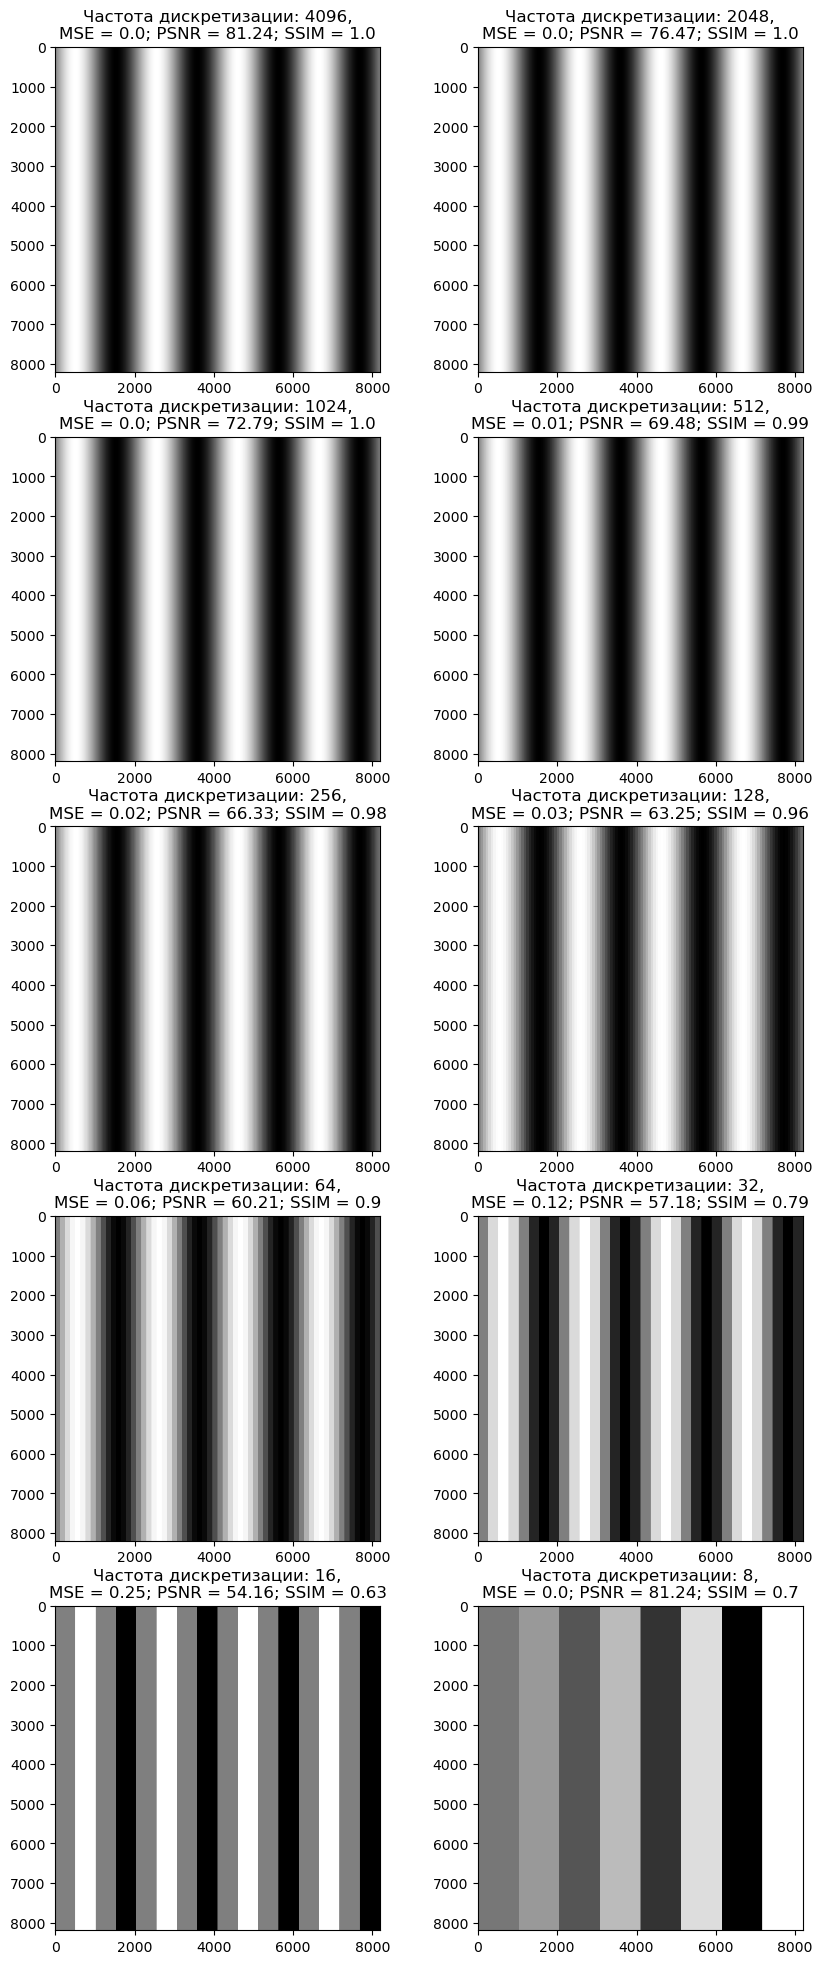

In [38]:
def task(signals=signals):
    fig = plt.figure(figsize=(10, 70))
    for n, i in enumerate(signals):
        fig.add_subplot(14, 2, n+1)
        plt.title(f'Частота дискретизации: {int(8192/([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024][n]))},\nMSE = {round(msegraph[n], 2)}; PSNR = {round(psnrgraph[n], 2)}; SSIM = {round(ssimgraph[n], 2)}')  
        plt.imshow(i, cmap='gray')
task()

Получить зависимость показателей качества изображения от отношения частот дискретизации к исходному сигналу и построить
соответствующие графики.

(4.0, 2000.0)

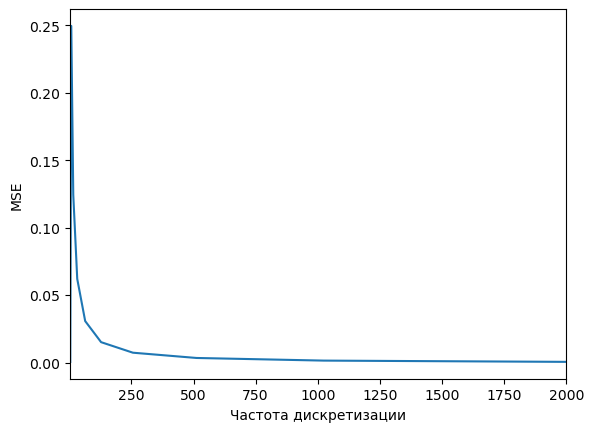

In [50]:
freqs = [int(4096/i) for i in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]]
plt.plot(freqs, msegraph)
plt.xlabel('Частота дискретизации')
plt.ylabel('MSE')
plt.xlim(4, 2000)

(4.0, 2000.0)

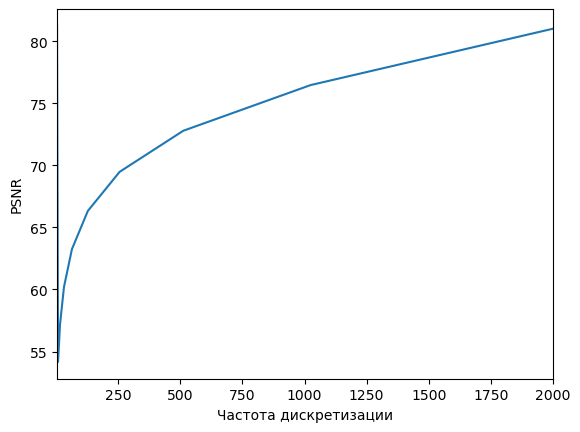

In [51]:
plt.plot(freqs, psnrgraph)
plt.xlabel('Частота дискретизации')
plt.ylabel('PSNR')
plt.xlim(4, 2000)

(4.0, 2000.0)

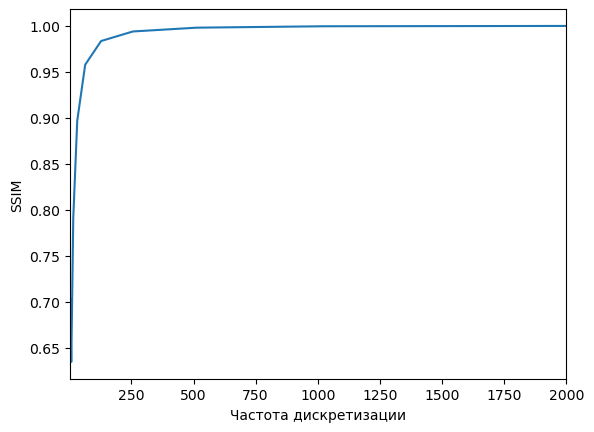

In [52]:
plt.plot(freqs, ssimgraph)
plt.xlabel('Частота дискретизации')
plt.ylabel('SSIM')
plt.xlim(4, 2000)

Из данной работы можно сделать вывод о том, что скорость уменьшения погрешности дискретизации снижается с увеличением частоты дискретизации. Другими словами, чем выше частота дискретизации, тем меньшую пользу приносит дальнейшее её увеличение. Визуально разница между частотой 512 и выше, и оригинальным изображением практически незаметна. Это также подтверждается графиком метрики SSIM. В целом детали изображения сохраняются при частоте 64 или 32, их может быть целесообразно использовать если одним из требований является низкий размер файла или низкая частота дискретизации по какой-либо другой причине. Частота дискретизации 8 или ниже для данного изображения не применима, так как на ней полностью теряется изображение.